<a href="https://colab.research.google.com/github/NeguseNegest/ARIMA-and-LSTM-for-Wind-Speed-Time-Series-Forecasting/blob/main/ThesisProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data pre-proccesing


In [ ]:
import pandas as pd
import numpy as np
import random
import tensorflow as tf
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score,  mean_absolute_error
from sklearn.preprocessing import StandardScaler
from IPython.display import display, Math
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [ ]:
'''

#Kombinera filerna till en enda csv fil
files = [
    "/content/HelsingforsJanuaryTOFebraury29.csv",
    "/content/HelsingforsMarsTOApril.csv",
    "/content/HelsingforsMayTOJune.csv",
    "/content/HelsingforsJulyTOAgust.csv",
    "/content/HelsingforsSeptemberTOoctober.csv",
    "/content/HelsingforsNovemberTODecember.csv"
]

df_list = [pd.read_csv(f) for f in files]

combined_df = pd.concat(df_list, ignore_index=True)

combined_df.to_csv("combined.csv", index=False)


'''



'\n\n#Kombinera filerna till en enda csv fil\nfiles = [\n    "/content/HelsingforsJanuaryTOFebraury29.csv",\n    "/content/HelsingforsMarsTOApril.csv",\n    "/content/HelsingforsMayTOJune.csv",\n    "/content/HelsingforsJulyTOAgust.csv",\n    "/content/HelsingforsSeptemberTOoctober.csv",\n    "/content/HelsingforsNovemberTODecember.csv"\n]\n\ndf_list = [pd.read_csv(f) for f in files]\n\ncombined_df = pd.concat(df_list, ignore_index=True)\n\ncombined_df.to_csv("combined.csv", index=False)\n\n\n'

In [ ]:
data=pd.read_csv('/content/combined.csv')
df=data.copy(deep=True)
df.head(1000)


,Observationsstation,År,Månad,Dag,Tid [Lokal tid],Daggpunktstemperatur medelvärde [°C],Lufttemperatur medelvärde [°C],Molnighet [1/8],Lufttryck medelvärde [hPa],Relativ luftfuktighet medelvärde [%],Nederbördsmängd medelvärde [mm],Snödjup medelvärde [cm],Vindriktning medelvärde [°],Byvindshastighet medelvärde [m/s],Vindhastighet medelvärde [m/s]
0,Helsingfors Kajsaniemi,2024,1,1,01:00,-16.2,-14.2,Klart (0/8),1019.8,84.5,0.0,21,20.7,4.9,2.2
1,Helsingfors Kajsaniemi,2024,1,1,02:00,-16.5,-14.5,Klart (0/8),1020.1,84.4,0.0,21,33.4,5.1,2.6
2,Helsingfors Kajsaniemi,2024,1,1,03:00,-16.8,-14.7,Klart (0/8),1020.3,83.9,0.0,21,35.6,5.4,3
3,Helsingfors Kajsaniemi,2024,1,1,04:00,-16.7,-14.5,Klart (0/8),1020.3,84.0,0.0,21,47,4.7,2.4
4,Helsingfors Kajsaniemi,2024,1,1,05:00,-16.5,-14.3,Klart (0/8),1020.5,83.6,0.0,21,46.9,5.5,2.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Helsingfors Kajsaniemi,2024,2,11,12:00,-17.1,-9.5,Mulet (8/8),1013.2,54.1,0.0,23,57.4,7.3,4.2
996,Helsingfors Kajsaniemi,2024,2,11,13:00,-16.3,-8.9,Mulet (8/8),1012.9,55.2,0.0,23,60.5,7.4,4.7
997,Helsingfors Kajsaniemi,2024,2,11,14:00,-15.7,-8.5,Mulet (8/8),1012.7,55.8,0.0,22.9,62.2,8.1,5.2
998,Helsingfors Kajsaniemi,2024,2,11,15:00,-15.5,-8.0,Mulet (8/8),1012.6,54.8,0.0,23,60.1,7.8,5.2


In [ ]:
'''Få info om data'''

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8639 entries, 0 to 8638
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Observationsstation                   8639 non-null   object
 1   År                                    8639 non-null   int64 
 2   Månad                                 8639 non-null   int64 
 3   Dag                                   8639 non-null   int64 
 4   Tid [Lokal tid]                       8639 non-null   object
 5   Daggpunktstemperatur medelvärde [°C]  8639 non-null   object
 6   Lufttemperatur medelvärde [°C]        8639 non-null   object
 7   Molnighet [1/8]                       8639 non-null   object
 8   Lufttryck medelvärde [hPa]            8639 non-null   object
 9   Relativ luftfuktighet medelvärde [%]  8639 non-null   object
 10  Nederbördsmängd medelvärde [mm]       8639 non-null   object
 11  Snödjup medelvärde [cm]       

In [ ]:
'''Molnighet kolumnen har ett enda NaN värde, vi tar bort denna.'''

df = df[df['Molnighet [1/8]'] != '-']
df['Molnighet [1/8]'].unique()




array(['Klart (0/8)', 'Halv klart (5/8)', 'Mulet (8/8)', 'Klart (1/8)',
       'Mest klart (2/8)', 'Molnigt (7/8)', 'Halv klart (4/8)',
       'Molnigt (6/8)', 'Molnigheten kan inte fastställas (9/8)',
       'Mest klart (3/8)'], dtype=object)

In [ ]:

#ta bort strängen framför siffran före *

df['Molnighet [1/8]'] = df['Molnighet [1/8]'].astype(str).str.extract(r'(\d+)/\d+')



In [ ]:

df['Molnighet [1/8]'] = pd.to_numeric(df['Molnighet [1/8]'], errors='coerce').astype('float')


# Konvertera till tid format
df['Tid [Lokal tid]'] = pd.to_datetime(df['Tid [Lokal tid]'], format='%H:%M')

#konvertera snödjup, horisontell sikt,vindriktning,byvindshastigheten,vindhastigheten till float  från object
# För att konvertera alla object-kolumner till numeriska värden (utom 'Tid [Lokal tid]')
object_cols = df.select_dtypes(include='object').columns.tolist()
if 'Tid [Lokal tid]' in object_cols:
    object_cols.remove('Tid [Lokal tid]')
for col in object_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.drop(columns=['Observationsstation'], inplace=True, errors='ignore')

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 8638 entries, 0 to 8638
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   År                                    8638 non-null   int64         
 1   Månad                                 8638 non-null   int64         
 2   Dag                                   8638 non-null   int64         
 3   Tid [Lokal tid]                       8638 non-null   datetime64[ns]
 4   Daggpunktstemperatur medelvärde [°C]  8636 non-null   float64       
 5   Lufttemperatur medelvärde [°C]        8636 non-null   float64       
 6   Molnighet [1/8]                       8638 non-null   float64       
 7   Lufttryck medelvärde [hPa]            8636 non-null   float64       
 8   Relativ luftfuktighet medelvärde [%]  8636 non-null   float64       
 9   Nederbördsmängd medelvärde [mm]       8634 non-null   float64       
 10  Snödj

# Clean the data. We have several columns with NaN values. Should we replace them with the mean of the column or drop them entirely?

In [ ]:
for column in list(df.columns):
  print(f'Column {column} has  {(df[column].isna().sum())}  NaN values \n')

Column År has  0  NaN values 

Column Månad has  0  NaN values 

Column Dag has  0  NaN values 

Column Tid [Lokal tid] has  0  NaN values 

Column Daggpunktstemperatur medelvärde [°C] has  2  NaN values 

Column Lufttemperatur medelvärde [°C] has  2  NaN values 

Column Molnighet [1/8] has  0  NaN values 

Column Lufttryck medelvärde [hPa] has  2  NaN values 

Column Relativ luftfuktighet medelvärde [%] has  2  NaN values 

Column Nederbördsmängd medelvärde [mm] has  4  NaN values 

Column Snödjup medelvärde [cm] has  501  NaN values 

Column Vindriktning medelvärde [°] has  84  NaN values 

Column Byvindshastighet medelvärde [m/s] has  84  NaN values 

Column Vindhastighet medelvärde [m/s] has  84  NaN values 



In [ ]:
''' We replace the NaN values with the column mean for the specific feature'''


numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    if df[col].isna().sum() > 0:
        df[col].fillna(df[col].mean(), inplace=True)

for column in df.columns:
    print(f'Column {column} has {df[column].isna().sum()} NaN values')


Column År has 0 NaN values
Column Månad has 0 NaN values
Column Dag has 0 NaN values
Column Tid [Lokal tid] has 0 NaN values
Column Daggpunktstemperatur medelvärde [°C] has 0 NaN values
Column Lufttemperatur medelvärde [°C] has 0 NaN values
Column Molnighet [1/8] has 0 NaN values
Column Lufttryck medelvärde [hPa] has 0 NaN values
Column Relativ luftfuktighet medelvärde [%] has 0 NaN values
Column Nederbördsmängd medelvärde [mm] has 0 NaN values
Column Snödjup medelvärde [cm] has 0 NaN values
Column Vindriktning medelvärde [°] has 0 NaN values
Column Byvindshastighet medelvärde [m/s] has 0 NaN values
Column Vindhastighet medelvärde [m/s] has 0 NaN values


<ipython-input-9-6354cf4f48a7>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


# We divide Tid [Lokal tid]  into 'time' and 'hour'

In [ ]:
df['Hour_of_day'] = df['Tid [Lokal tid]'].dt.hour


# Vi tar bort tid kolumnen nu: Tid[Lokal tid]
df=df.drop(['Tid [Lokal tid]'],axis=1)

df['Hour_of_day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23,  0], dtype=int32)

## We would like to create new columns that store the observations at t+1 for each non-categorical value.

In [ ]:


features_to_shift = [
    "Daggpunktstemperatur medelvärde [°C]",
    "Lufttemperatur medelvärde [°C]",
    "Lufttryck medelvärde [hPa]",
    "Relativ luftfuktighet medelvärde [%]",
    "Nederbördsmängd medelvärde [mm]",
    "Snödjup medelvärde [cm]",
    "Vindriktning medelvärde [°]",
    "Byvindshastighet medelvärde [m/s]",
    "Vindhastighet medelvärde [m/s]",
    'Molnighet [1/8]'

]

df[features_to_shift] = df[features_to_shift].apply(pd.to_numeric, errors='coerce')

for feature in features_to_shift:
    df[f"{feature} for t+1"] = df[feature].shift(-1)

df = df.iloc[:-1]

df.head(1000)

,År,Månad,Dag,Daggpunktstemperatur medelvärde [°C],Lufttemperatur medelvärde [°C],Molnighet [1/8],Lufttryck medelvärde [hPa],Relativ luftfuktighet medelvärde [%],Nederbördsmängd medelvärde [mm],Snödjup medelvärde [cm],...,Daggpunktstemperatur medelvärde [°C] for t+1,Lufttemperatur medelvärde [°C] for t+1,Lufttryck medelvärde [hPa] for t+1,Relativ luftfuktighet medelvärde [%] for t+1,Nederbördsmängd medelvärde [mm] for t+1,Snödjup medelvärde [cm] for t+1,Vindriktning medelvärde [°] for t+1,Byvindshastighet medelvärde [m/s] for t+1,Vindhastighet medelvärde [m/s] for t+1,Molnighet [1/8] for t+1
0,2024,1,1,-16.2,-14.2,0.0,1019.8,84.5,0.0,21.0,...,-16.5,-14.5,1020.1,84.4,0.0,21.0,33.4,5.1,2.6,0.0
1,2024,1,1,-16.5,-14.5,0.0,1020.1,84.4,0.0,21.0,...,-16.8,-14.7,1020.3,83.9,0.0,21.0,35.6,5.4,3.0,0.0
2,2024,1,1,-16.8,-14.7,0.0,1020.3,83.9,0.0,21.0,...,-16.7,-14.5,1020.3,84.0,0.0,21.0,47.0,4.7,2.4,0.0
3,2024,1,1,-16.7,-14.5,0.0,1020.3,84.0,0.0,21.0,...,-16.5,-14.3,1020.5,83.6,0.0,21.0,46.9,5.5,2.7,0.0
4,2024,1,1,-16.5,-14.3,0.0,1020.5,83.6,0.0,21.0,...,-16.4,-14.2,1020.6,83.7,0.0,21.0,54.2,5.4,3.2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2024,2,11,-17.1,-9.5,8.0,1013.2,54.1,0.0,23.0,...,-16.3,-8.9,1012.9,55.2,0.0,23.0,60.5,7.4,4.7,8.0
996,2024,2,11,-16.3,-8.9,8.0,1012.9,55.2,0.0,23.0,...,-15.7,-8.5,1012.7,55.8,0.0,22.9,62.2,8.1,5.2,8.0
997,2024,2,11,-15.7,-8.5,8.0,1012.7,55.8,0.0,22.9,...,-15.5,-8.0,1012.6,54.8,0.0,23.0,60.1,7.8,5.2,8.0
998,2024,2,11,-15.5,-8.0,8.0,1012.6,54.8,0.0,23.0,...,-15.4,-7.4,1012.0,52.7,0.0,23.0,58.9,8.4,5.3,8.0


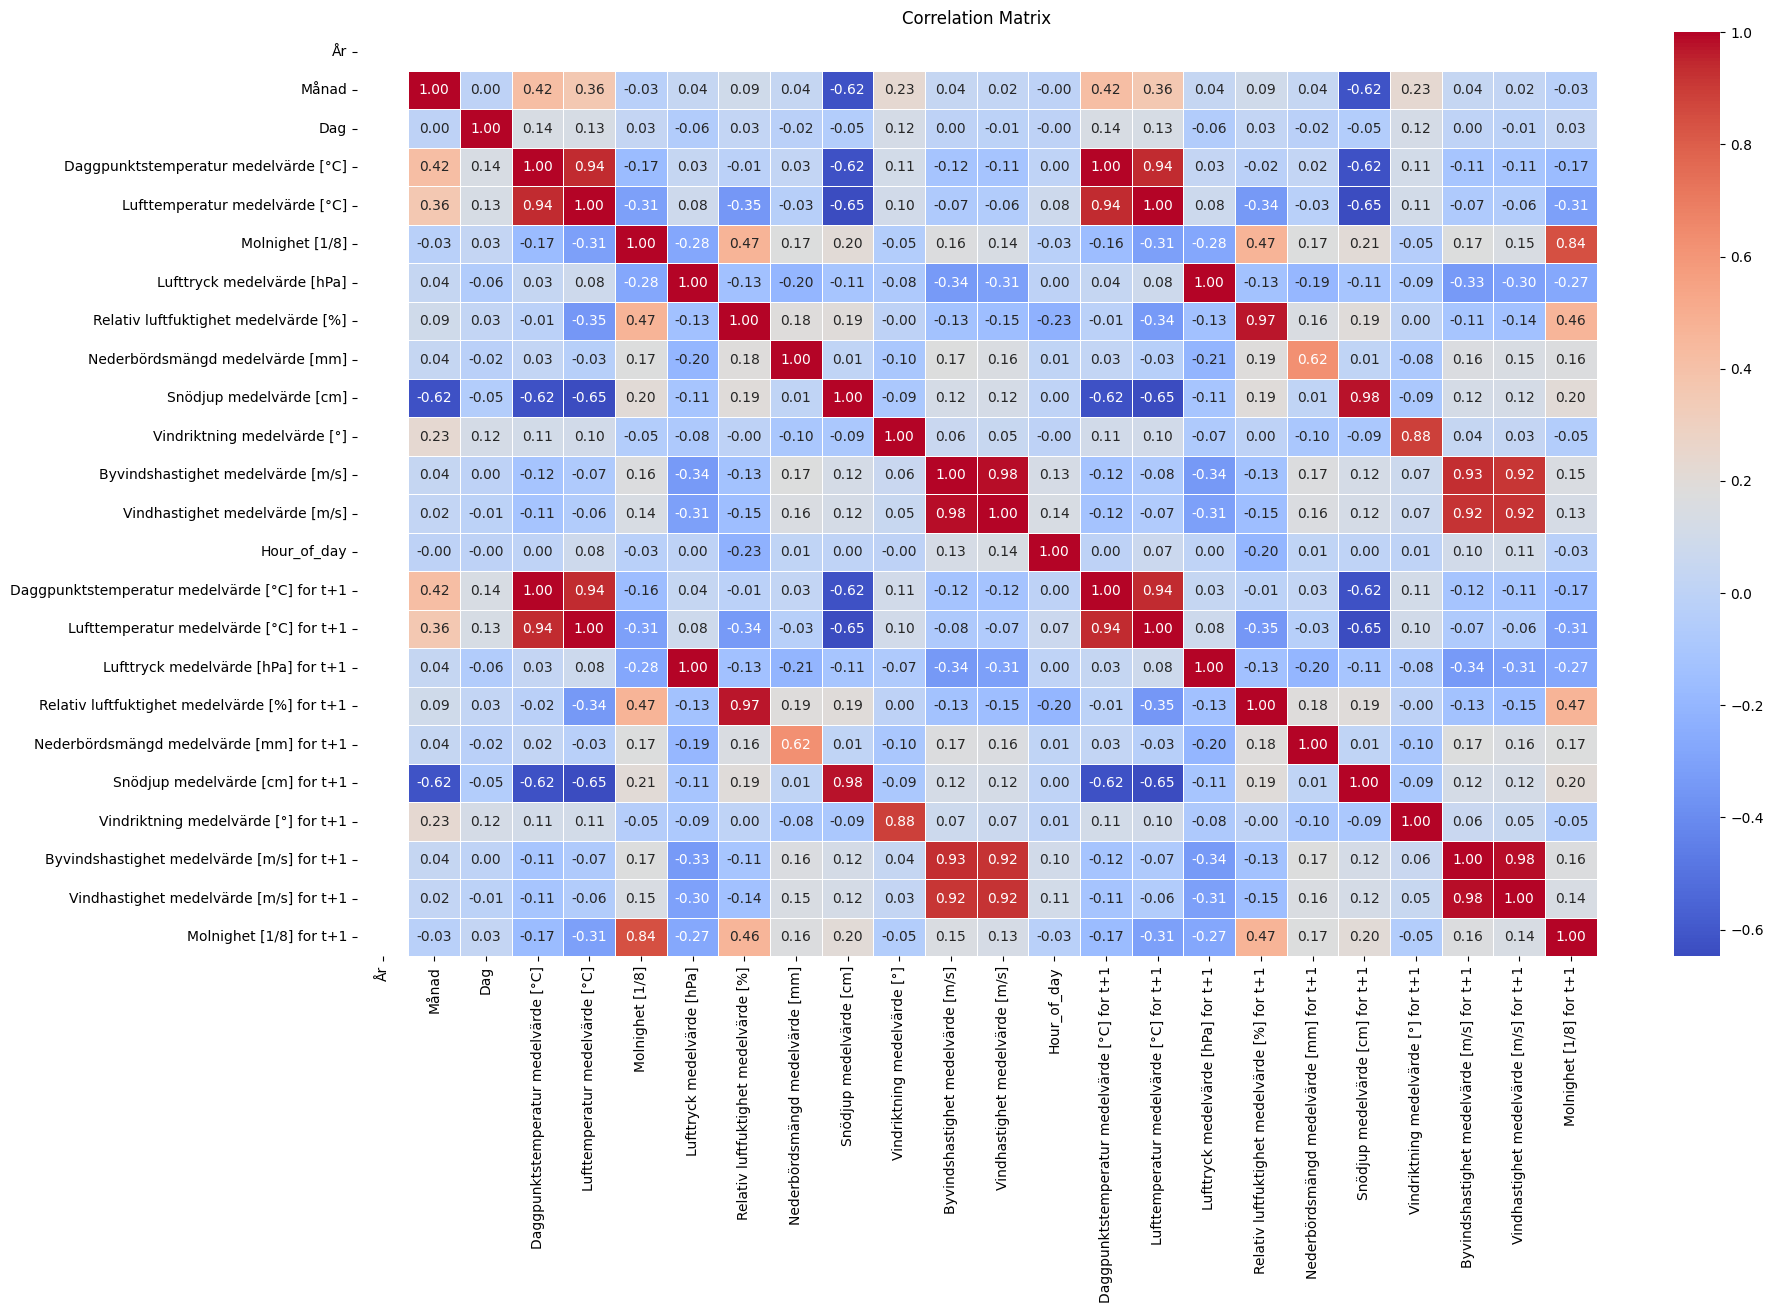

In [ ]:
corr_matrix = df.corr()

plt.figure(figsize=(20, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

## Normalize every non-catagorical feature so that they have mean 0 and variance 1

In [ ]:
columns_to_exclude = ["Observationsstation", "År", "Månad", "Dag", "Hour_of_day"]
#,"Vindhastighet medelvärde [m/s] for t+1"

numerical_cols = [col for col in df.columns if col not in columns_to_exclude]

scaler = StandardScaler()

df[numerical_cols]=scaler.fit_transform(df[numerical_cols])


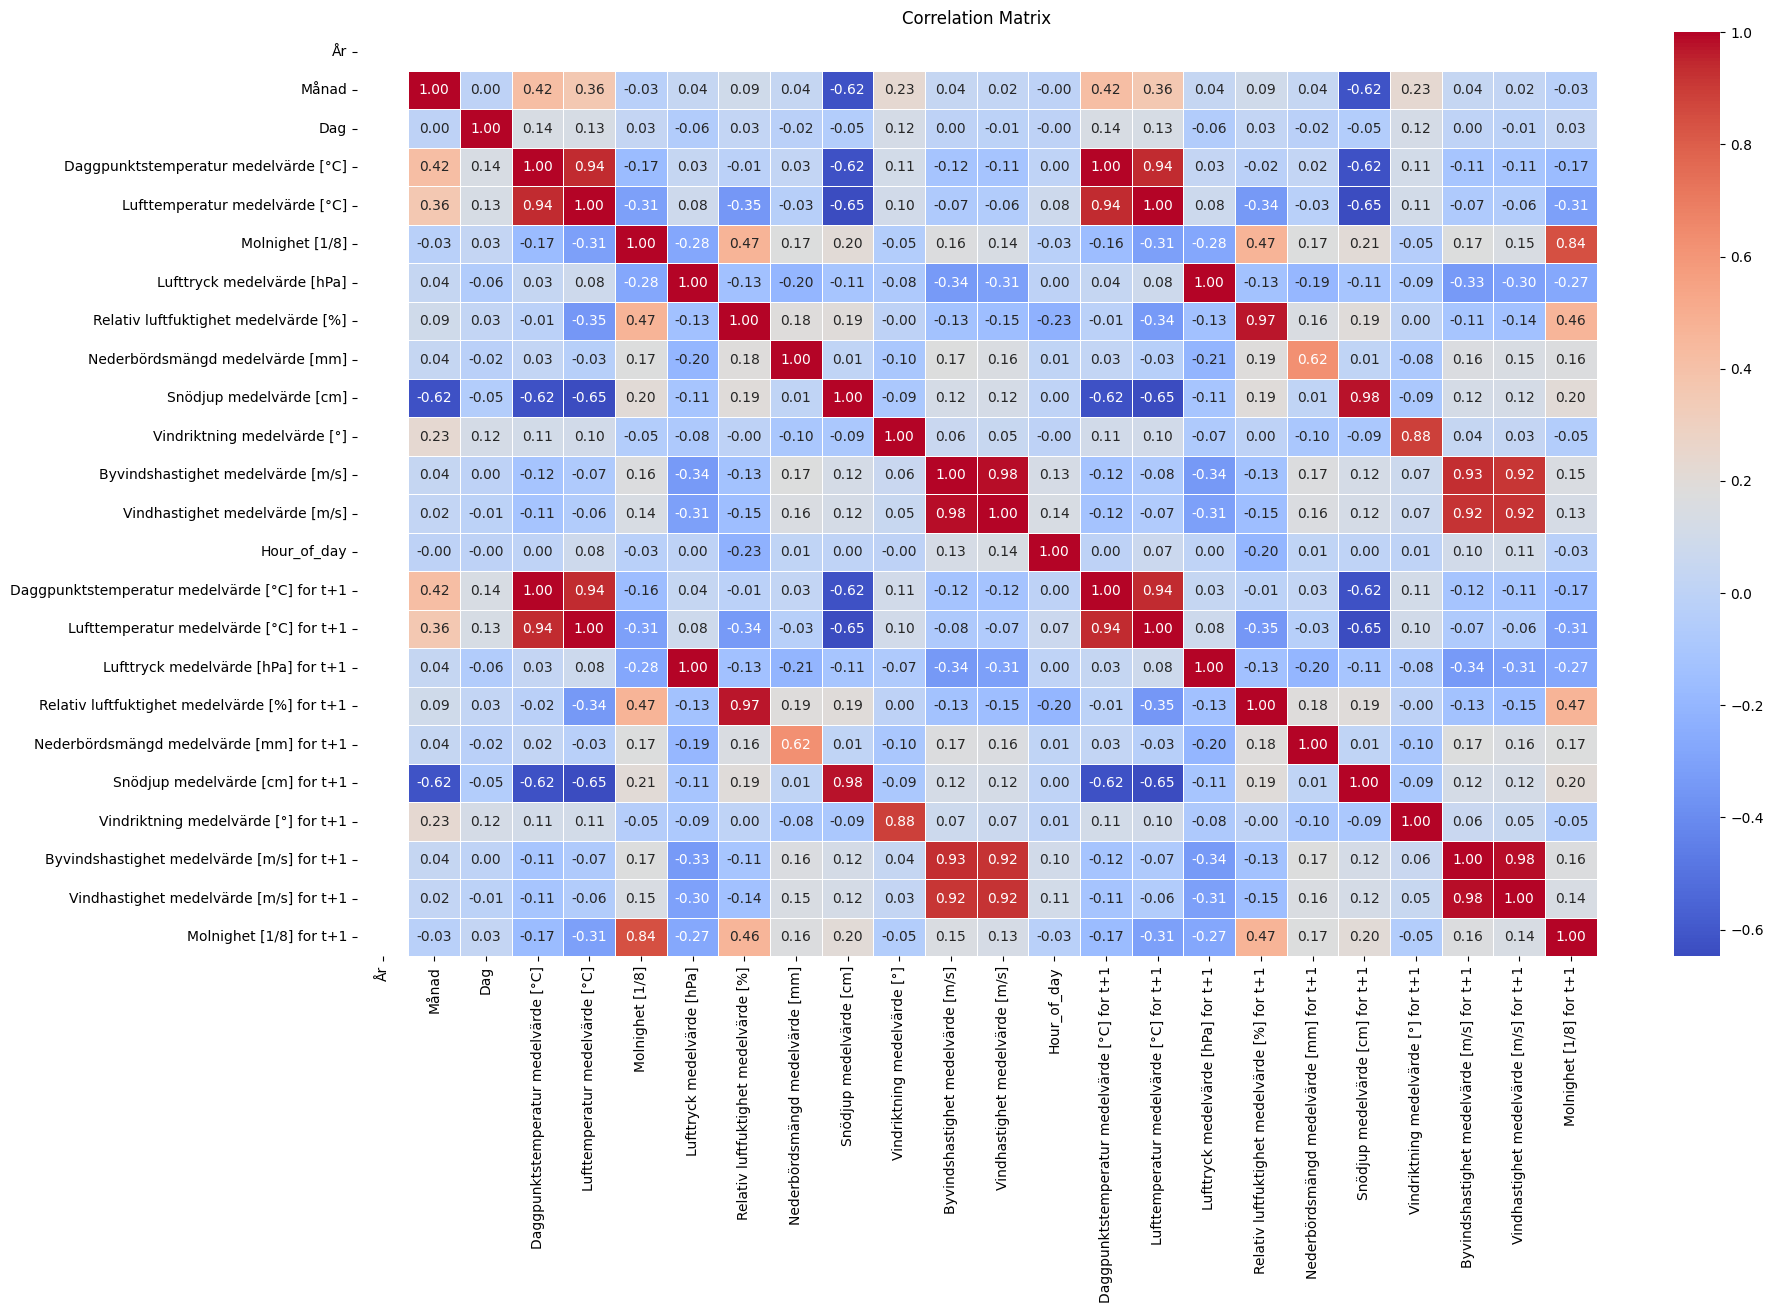

In [ ]:
corr_matrix = df.corr()

plt.figure(figsize=(20, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# **Regression analysis**. We start with doing a simple regression using LinearRegression(). After this we try both the Ridge and Lasso regression to determine which provides the best fit. We have multicollinearity in our dataset and i suspect that Ridge regression will be best suited here.

Linear Regression (time-series) error results:
  RMSE: 0.471
  MAE : 0.354
  R^2 : 0.812 

The following are the coefficients in the function:


<IPython.core.display.Math object>

                                 Feature  Coefficient  Absolute Coef
10     Byvindshastighet medelvärde [m/s]     0.922884       0.922884
2   Daggpunktstemperatur medelvärde [°C]     0.246897       0.246897
4         Lufttemperatur medelvärde [°C]    -0.191732       0.191732
7   Relativ luftfuktighet medelvärde [%]    -0.112448       0.112448
0                                  Månad    -0.028122       0.028122
11           Vindriktning medelvärde [°]    -0.025191       0.025191
5                        Molnighet [1/8]     0.014630       0.014630
8        Nederbördsmängd medelvärde [mm]    -0.011645       0.011645
9                Snödjup medelvärde [cm]     0.009156       0.009156
6             Lufttryck medelvärde [hPa]     0.005691       0.005691
3                            Hour_of_day    -0.003492       0.003492
1                                    Dag    -0.001059       0.001059


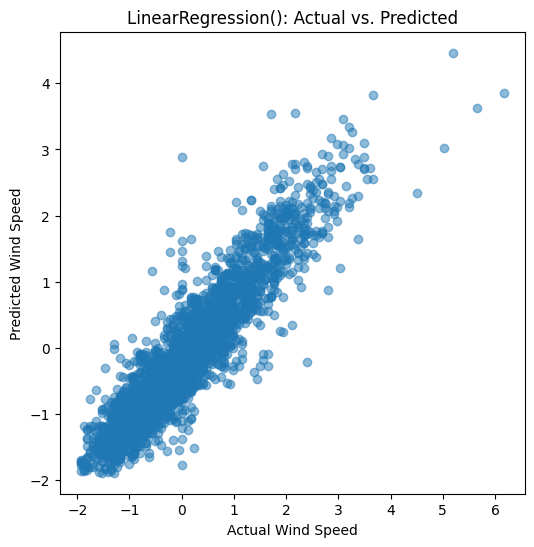

In [ ]:
feature_cols = [
    "Månad",
    "Dag",
    "Daggpunktstemperatur medelvärde [°C]",
    "Hour_of_day",
    "Lufttemperatur medelvärde [°C]",
    "Molnighet [1/8]",
    "Lufttryck medelvärde [hPa]",
    "Relativ luftfuktighet medelvärde [%]",
    "Nederbördsmängd medelvärde [mm]",
    "Snödjup medelvärde [cm]",
    "Byvindshastighet medelvärde [m/s]",
    "Vindriktning medelvärde [°]",




]


#Vår beroende variabel är vindhastighet
target_col = "Vindhastighet medelvärde [m/s] for t+1"

train_size = int(len(df) * 0.7) #80% data använder vi för träning

df_train = df.iloc[:train_size].copy()
df_test = df.iloc[train_size:].copy()



X_train = df_train[feature_cols]
y_train = df_train[target_col]

X_test = df_test[feature_cols]
y_test = df_test[target_col]

lr_model = LinearRegression()

# Fit on the training set
lr_model.fit(X_train, y_train)



y_pred = lr_model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression (time-series) error results:")
print(f"  RMSE: {rmse:.3f}")
print(f"  MAE : {mae:.3f}")
print(f"  R^2 : {r2:.3f} \n")




coef_dict = {
    "Feature": feature_cols,
    "Coefficient": lr_model.coef_
}
coef_df = pd.DataFrame(coef_dict)
coef_df["Absolute Coef"] = coef_df["Coefficient"].abs()
coef_df = coef_df.sort_values("Absolute Coef", ascending=False)
print('The following are the coefficients in the function:')

display(Math(r'Y = \beta_1 \cdot x_1 + \beta_2 \cdot x_2 + \dots + \beta_i \cdot x_i'))
print(coef_df)


plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
#plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Wind Speed")
plt.ylabel("Predicted Wind Speed")
plt.title("LinearRegression(): Actual vs. Predicted")
plt.show()


## Wind speed vs actual speed over time(in this case we use the row index)



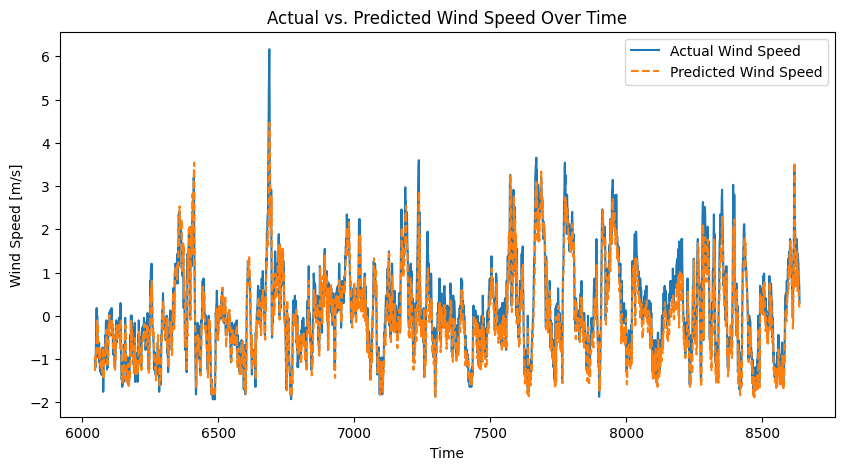

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df_test.index, y_test, label="Actual Wind Speed", linestyle="-")
plt.plot(df_test.index, y_pred, label="Predicted Wind Speed", linestyle="--")
plt.xlabel("Time")
plt.ylabel("Wind Speed [m/s]")
plt.title("Actual vs. Predicted Wind Speed Over Time")
plt.legend()
plt.show()

## MSE and R^2 error over time


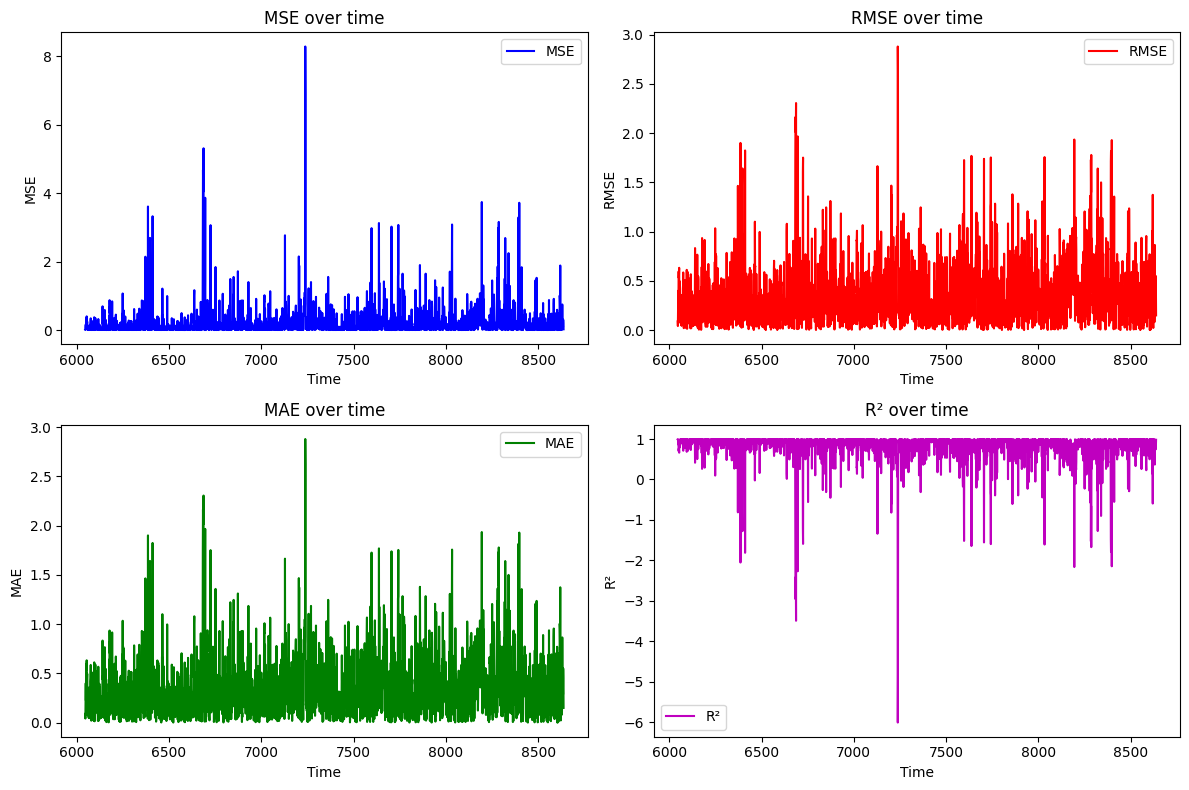

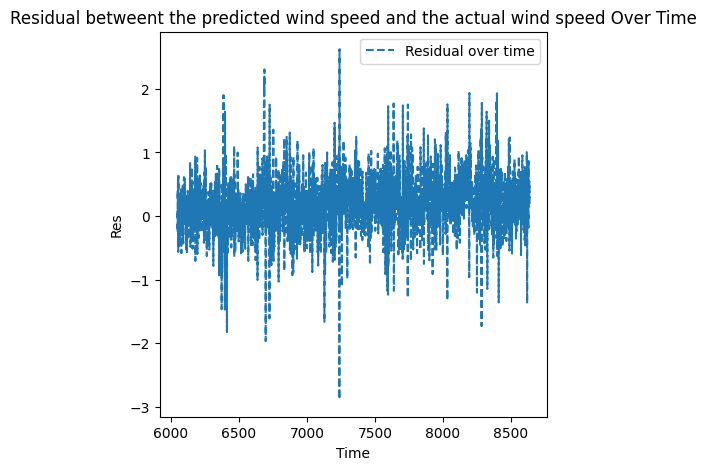

In [ ]:
mse_series = (y_test - y_pred) ** 2
rmse_series = np.sqrt(mse_series)
mae_series = np.abs(y_test - y_pred)
r2_series = 1 - (mse_series / np.var(y_test))  # R
residual=y_test-y_pred

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# mse
axs[0, 0].plot(df_test.index, mse_series, label="MSE", color="b")
axs[0, 0].set_title('MSE over time')
axs[0, 0].set_xlabel('Time')
axs[0, 0].set_ylabel('MSE')
axs[0, 0].legend()

# rmse
axs[0, 1].plot(df_test.index, rmse_series, label="RMSE", color="r")
axs[0, 1].set_title('RMSE over time')
axs[0, 1].set_xlabel('Time')
axs[0, 1].set_ylabel('RMSE')
axs[0, 1].legend()

# mae
axs[1, 0].plot(df_test.index, mae_series, label="MAE", color="g")
axs[1, 0].set_title('MAE over time')
axs[1, 0].set_xlabel('Time')
axs[1, 0].set_ylabel('MAE')
axs[1, 0].legend()

# r2
axs[1, 1].plot(df_test.index, r2_series, label="R²", color="m")
axs[1, 1].set_title('R² over time')
axs[1, 1].set_xlabel('Time')
axs[1, 1].set_ylabel('R²')
axs[1, 1].legend()

plt.tight_layout()
plt.show()


plt.figure(figsize=(5, 5))
plt.plot(df_test.index, residual, label="Residual over time", linestyle="--")
plt.xlabel("Time")
plt.ylabel("Res")
plt.title("Residual betweent the predicted wind speed and the actual wind speed Over Time")
plt.legend()
plt.show()



# **RIDGE-Regression**  We are to minimize the following :\begin{equation}
\sum_{i=1}^n\left(y_i-\hat{y}_i(\mathbf{w})\right)^2 \quad+\lambda \sum_{j=1}^d w_j^2 .
\end{equation}
\\
Where $w_i$ are the weights. $\lambda$ is to be choosen so we get the best fit.

Best alpha for Ridge: {'alpha': 0.001}
Best Ridge RMSE: 0.47144521886675234
Best Ridge R^2: 0.8119316104377142
Best Ridge MAE 0.35393336508157075


Byvindshastighet medelvärde [m/s]       0.922884
Daggpunktstemperatur medelvärde [°C]    0.246879
Molnighet [1/8]                         0.014630
Snödjup medelvärde [cm]                 0.009156
Lufttryck medelvärde [hPa]              0.005691
Dag                                    -0.001059
Hour_of_day                            -0.003492
Nederbördsmängd medelvärde [mm]        -0.011645
Vindriktning medelvärde [°]            -0.025191
Månad                                  -0.028122
Relativ luftfuktighet medelvärde [%]   -0.112442
Lufttemperatur medelvärde [°C]         -0.191713
dtype: float64


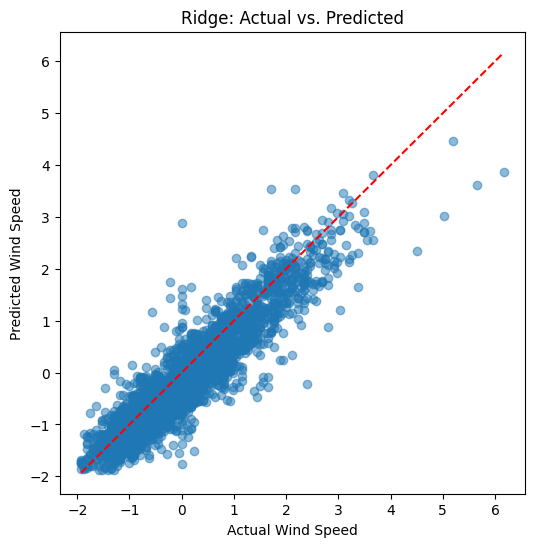

In [ ]:

param_grid = {
    'alpha': [0.001, 0.1, 1.0, 10.0, 100.0]
}
ridge_reg = Ridge()
grid_search_ridge = GridSearchCV(ridge_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_ridge.fit(X_train, y_train)

print("Best alpha for Ridge:", grid_search_ridge.best_params_)
best_ridge_model = grid_search_ridge.best_estimator_

y_pred_best_ridge = best_ridge_model.predict(X_test)
rmse_best_ridge = np.sqrt(mean_squared_error(y_test, y_pred_best_ridge))
r2_best_ridge = r2_score(y_test, y_pred_best_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_best_ridge)

coeffs_ridge = pd.Series(best_ridge_model.coef_, index=feature_cols).sort_values(ascending=False)


print("Best Ridge RMSE:", rmse_best_ridge)
print("Best Ridge R^2:", r2_best_ridge)
print('Best Ridge MAE',mae_ridge)
print('\n')
print(coeffs_ridge)


y_pred_best_ridge = best_ridge_model.predict(X_test)

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_best_ridge, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Wind Speed")
plt.ylabel("Predicted Wind Speed")
plt.title("Ridge: Actual vs. Predicted")
plt.show()


# **LASSO REGRESSION** We are to minimize the following:
$$
\sum_{i=1}^n\left(y_i-\hat{y}_i(\mathbf{w})\right)^2 \quad+\lambda \sum_{j=1}^d |w_j| .
$$

# The Lasso regression finds the least relevant features and set their weights to 0. (Reduces dimensionality)

Best alpha for Lasso: {'alpha': 0.001}
Best Lasso RMSE: 0.4585043300040814
Best Lasso R^2: 0.8221146359019877
Best Lasso MAE:0.3424677824557432 

Byvindshastighet medelvärde [m/s]       0.922725
Daggpunktstemperatur medelvärde [°C]    0.057365
Molnighet [1/8]                         0.011103
Snödjup medelvärde [cm]                 0.007936
Lufttryck medelvärde [hPa]              0.002104
Lufttemperatur medelvärde [°C]          0.000000
Dag                                    -0.000963
Hour_of_day                            -0.003356
Nederbördsmängd medelvärde [mm]        -0.012080
Månad                                  -0.023884
Vindriktning medelvärde [°]            -0.024955
Relativ luftfuktighet medelvärde [%]   -0.042039
dtype: float64


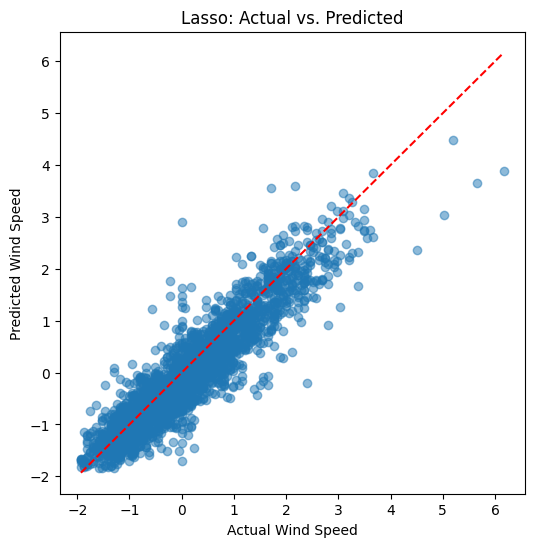

In [ ]:
values = [x for x in np.arange(0.0, 100, 0.5)]

alpha_val={'alpha':[0.001, 0.01, 0.1, 1.0, 10.0]}

lasso_regression=Lasso()

grid_search_lasso = GridSearchCV(lasso_regression,alpha_val, cv=5, scoring='neg_mean_squared_error')
grid_search_lasso.fit(X_train, y_train)

print("Best alpha for Lasso:", grid_search_lasso.best_params_)
best_lasso_model = grid_search_lasso.best_estimator_

y_pred_best_lasso = best_lasso_model.predict(X_test)
rmse_best_lasso = np.sqrt(mean_squared_error(y_test, y_pred_best_lasso))
r2_best_lasso = r2_score(y_test, y_pred_best_lasso)
mae = mean_absolute_error(y_test, y_pred_best_lasso)
coeffs = pd.Series(best_lasso_model.coef_, index=feature_cols).sort_values(ascending=False)

print("Best Lasso RMSE:", rmse_best_lasso)
print("Best Lasso R^2:", r2_best_lasso)
print(f'Best Lasso MAE:{mae} \n')
print(coeffs)




plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_best_lasso, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Wind Speed")
plt.ylabel("Predicted Wind Speed")
plt.title("Lasso: Actual vs. Predicted")
plt.show()



In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8637 entries, 0 to 8637
Data columns (total 24 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   År                                            8637 non-null   int64  
 1   Månad                                         8637 non-null   int64  
 2   Dag                                           8637 non-null   int64  
 3   Daggpunktstemperatur medelvärde [°C]          8637 non-null   float64
 4   Lufttemperatur medelvärde [°C]                8637 non-null   float64
 5   Molnighet [1/8]                               8637 non-null   float64
 6   Lufttryck medelvärde [hPa]                    8637 non-null   float64
 7   Relativ luftfuktighet medelvärde [%]          8637 non-null   float64
 8   Nederbördsmängd medelvärde [mm]               8637 non-null   float64
 9   Snödjup medelvärde [cm]                       8637 non-null   float6